<b>Part 1: Exploratory Data Analysis</b>

The attached logins.json file contains (simulated) timestamps of user logins in a  particular  geographic location.  Aggregate these login counts based on 15­ minute  time  intervals, and  visualize  and  describe the resulting time     series of login counts in  ways that best characterize the underlying patterns of the demand. Please report/illustrate     important features of the demand,  such as daily cycles. If there are data quality issues, please report them. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfLogin = pd.read_json('logins.json')

In [3]:
dfLogin.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
dfLogin.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [5]:
dfLogin.keys()

Index(['login_time'], dtype='object')

In [6]:
dfLogin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


So there is no null values, so do not have to worry about that

In [7]:
dfLogin.set_index('login_time', inplace=True)

In [8]:
dfLogin['count'] = 1
dfLogin = dfLogin.resample('15T').sum()

In [9]:
dfLogin.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
dfLogin.keys()

Index(['count'], dtype='object')

In [11]:
dfLogin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [12]:
dfLogin = dfLogin.fillna(0)

In [13]:
max(dfLogin['count'])

73

In [14]:
dfLogin.loc[dfLogin['count'] == 73]

,count
login_time,
1970-03-01 04:30:00,73


In [15]:
type(dfLogin.index)

pandas.core.indexes.datetimes.DatetimeIndex

C:\Users\ngmat\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


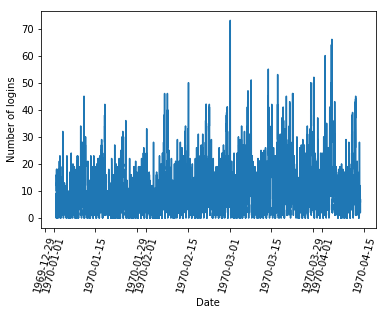

In [16]:
#show series
plt.plot(dfLogin)
plt.xlabel("Date")
plt.ylabel("Number of logins")
plt.xticks(rotation=75);

There is overplotting in this graph. There might be trend but is hard to tell. It is probably better to a subset of the data to see if there is any trend

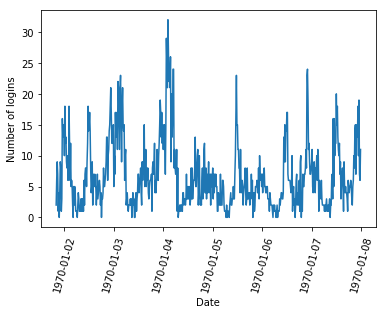

In [17]:
plt.plot(dfLogin['1970-01-01': '1970-01-07'])
plt.xlabel("Date")
plt.ylabel("Number of logins")
plt.xticks(rotation=75);

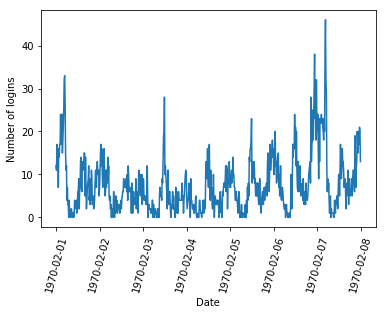

In [18]:
plt.plot(dfLogin['1970-02-01': '1970-02-07'])
plt.xlabel("Date")
plt.ylabel("Number of logins")
plt.xticks(rotation=75);

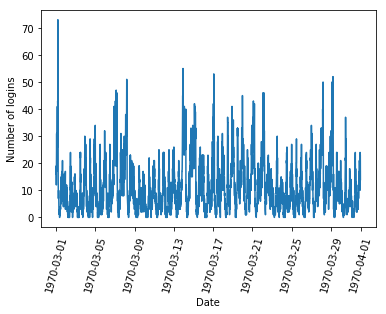

In [19]:
plt.plot(dfLogin['1970-03-01': '1970-03-31'])
plt.xlabel("Date")
plt.ylabel("Number of logins")
plt.xticks(rotation=75);

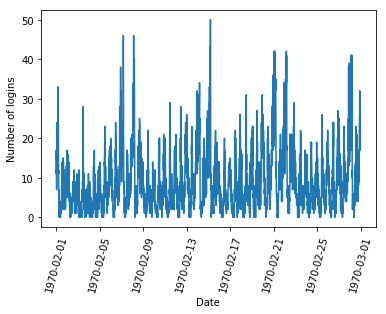

In [20]:
plt.plot(dfLogin['1970-02-01': '1970-02-28'])
plt.xlabel("Date")
plt.ylabel("Number of logins")
plt.xticks(rotation=75);

There is still overplotting in this graph. There might be trend but is hard to tell. There are spiked on certain days. Those days could be weekends. There needs to be an assignment of weekdays to these dates

In [21]:
dfLogin['Month'] = dfLogin.index.month
dfLogin['Week'] = dfLogin.index.week
dfLogin['Day'] = dfLogin.index.day
dfLogin['Hour'] = dfLogin.index.hour
dfLogin['weekday'] =  dfLogin.index.weekday

In [22]:
dfLogin['weekday_name'] =  dfLogin.index.weekday_name

In [23]:
print(dfLogin)

                     count  Month  Week  Day  Hour  weekday weekday_name
login_time                                                              
1970-01-01 20:00:00      2      1     1    1    20        3     Thursday
1970-01-01 20:15:00      6      1     1    1    20        3     Thursday
1970-01-01 20:30:00      9      1     1    1    20        3     Thursday
1970-01-01 20:45:00      7      1     1    1    20        3     Thursday
1970-01-01 21:00:00      1      1     1    1    21        3     Thursday
1970-01-01 21:15:00      4      1     1    1    21        3     Thursday
1970-01-01 21:30:00      0      1     1    1    21        3     Thursday
1970-01-01 21:45:00      4      1     1    1    21        3     Thursday
1970-01-01 22:00:00      9      1     1    1    22        3     Thursday
1970-01-01 22:15:00      8      1     1    1    22        3     Thursday
1970-01-01 22:30:00      1      1     1    1    22        3     Thursday
1970-01-01 22:45:00      3      1     1    1    22 

In [24]:
dfloginWeek4 = dfLogin.loc[dfLogin['Week']==4]

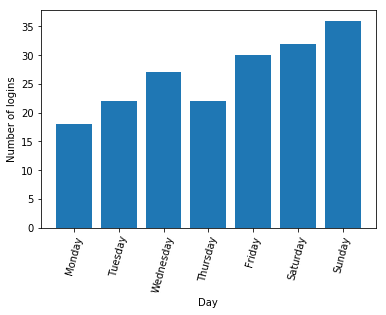

In [25]:
plt.bar(dfloginWeek4['weekday_name'], dfloginWeek4['count'])
plt.xlabel("Day")
plt.ylabel("Number of logins")
plt.xticks(rotation=75);

In [26]:
dfloginWeek12 = dfLogin.loc[dfLogin['Week']==12]

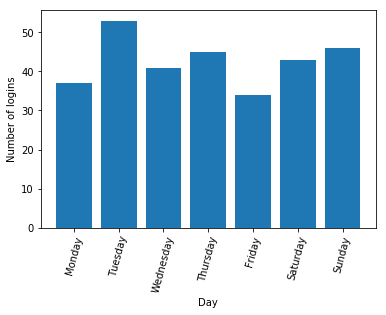

In [27]:
plt.bar(dfloginWeek12['weekday_name'], dfloginWeek12['count'])
plt.xlabel("Day")
plt.ylabel("Number of logins")
plt.xticks(rotation=75);

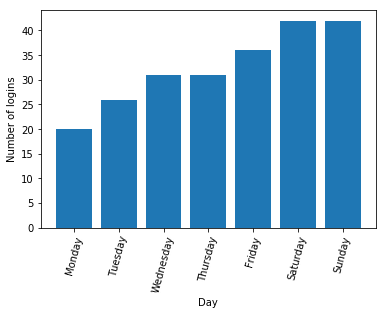

In [28]:
dfloginWeek8 = dfLogin.loc[dfLogin['Week']==8]
plt.bar(dfloginWeek8['weekday_name'], dfloginWeek8['count'])
plt.xlabel("Day")
plt.ylabel("Number of logins")
plt.xticks(rotation=75);

It appears that there is a lot of logins happening on the weekends based on the 3 random weeks I picked. 

In [29]:
# Group by month
print ('[Grouping by month]')
print (dfLogin.groupby('Month')['count'].aggregate(np.sum))

[Grouping by month]
Month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64


In [30]:
# Group by Week
print ('[Grouping by week]')
print (dfLogin.groupby('Week')['count'].aggregate(np.sum))

[Grouping by week]
Week
1     2374
2     5217
3     5023
4     4751
5     4744
6     5572
7     5915
8     7035
9     6554
10    7398
11    7338
12    8955
13    7285
14    8095
15    6491
16     395
Name: count, dtype: int64


In [31]:
# Group by Week Day
print ('[Grouping by Week Day Name Average]')
print (dfLogin.groupby('weekday_name')['count'].aggregate(np.mean))
print ('[Grouping by Week Day Name Sum]')
print (dfLogin.groupby('weekday_name')['count'].aggregate(np.sum))

[Grouping by Week Day Name Average]
weekday_name
Friday       10.561111
Monday        6.213380
Saturday     13.456250
Sunday       12.615972
Thursday      8.794118
Tuesday       6.895833
Wednesday     7.692708
Name: count, dtype: float64
[Grouping by Week Day Name Sum]
weekday_name
Friday       15208
Monday        8823
Saturday     19377
Sunday       18167
Thursday     11960
Tuesday       9268
Wednesday    10339
Name: count, dtype: int64


In [32]:
print ('[Grouping by Hour Average]')
print (dfLogin.groupby('Hour')['count'].aggregate(np.mean))
print ('[Grouping by Hour Sum]')
print (dfLogin.groupby('Hour')['count'].aggregate(np.sum))

[Grouping by Hour Average]
Hour
0     14.688725
1     15.482843
2     14.215686
3     11.840686
4     12.338235
5      7.218137
6      2.789216
7      1.997549
8      2.004902
9      3.742647
10     7.509804
11    14.213235
12    12.166667
13     8.850490
14     8.397059
15     7.446078
16     6.941176
17     6.333333
18     7.303922
19     8.007426
20    10.056373
21    13.781863
22    16.193627
23    14.848039
Name: count, dtype: float64
[Grouping by Hour Sum]
Hour
0     5993
1     6317
2     5800
3     4831
4     5034
5     2945
6     1138
7      815
8      818
9     1527
10    3064
11    5799
12    4964
13    3611
14    3426
15    3038
16    2832
17    2584
18    2980
19    3235
20    4103
21    5623
22    6607
23    6058
Name: count, dtype: int64


In [33]:
import seaborn as sns

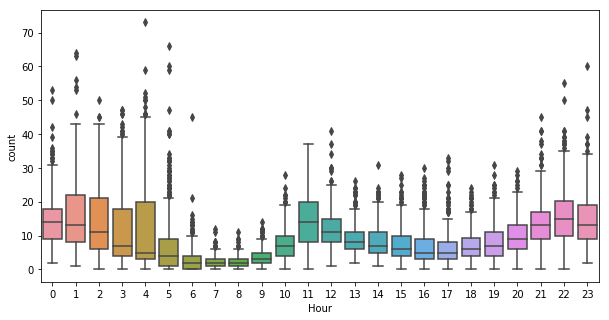

In [34]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='Hour', y='count', data=dfLogin)

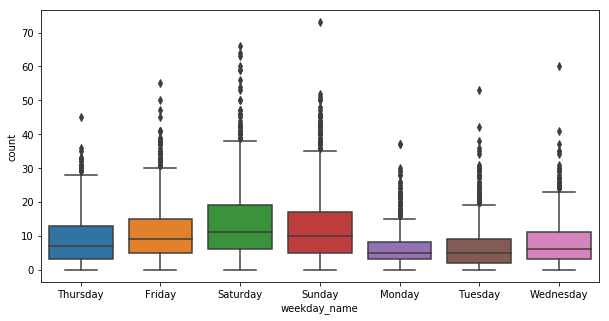

In [35]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='weekday_name', y='count', data=dfLogin)

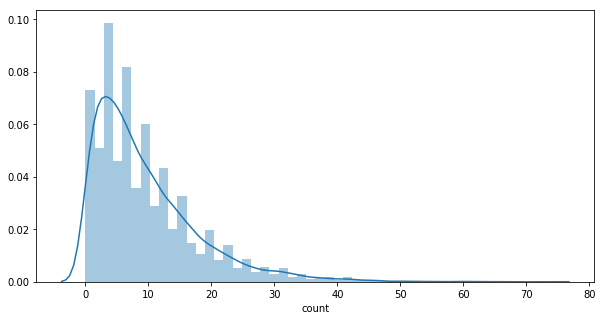

In [36]:
sns.distplot(dfLogin['count'])

In [37]:
dfLogin.describe()

,count,Month,Week,Day,Hour,weekday
count,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000
mean,9.515938,2.259093,8.325296,14.569268,11.496935,3.035554
std,8.328818,1.017219,4.215948,8.683342,6.922294,2.012722
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,5.000000,7.000000,5.000000,1.000000
50%,7.000000,2.000000,8.000000,14.000000,11.000000,3.000000
75%,13.000000,3.000000,12.000000,22.000000,17.000000,5.000000
max,73.000000,4.000000,16.000000,31.000000,23.000000,6.000000


In [38]:
print ('[Grouping by Week Day Name stats]')
print (dfLogin.groupby('weekday_name')['count'].aggregate(np.mean))
print (dfLogin.groupby('weekday_name')['count'].aggregate(np.std))

[Grouping by Week Day Name stats]
weekday_name
Friday       10.561111
Monday        6.213380
Saturday     13.456250
Sunday       12.615972
Thursday      8.794118
Tuesday       6.895833
Wednesday     7.692708
Name: count, dtype: float64
weekday_name
Friday        8.172082
Monday        5.029465
Saturday     10.357784
Sunday       10.091680
Thursday      7.058483
Tuesday       6.264071
Wednesday     6.567372
Name: count, dtype: float64


In [39]:
print ('[Grouping by Hour Average]')
print (dfLogin.groupby('Hour')['count'].aggregate(np.mean))
print (dfLogin.groupby('Hour')['count'].aggregate(np.std))

[Grouping by Hour Average]
Hour
0     14.688725
1     15.482843
2     14.215686
3     11.840686
4     12.338235
5      7.218137
6      2.789216
7      1.997549
8      2.004902
9      3.742647
10     7.509804
11    14.213235
12    12.166667
13     8.850490
14     8.397059
15     7.446078
16     6.941176
17     6.333333
18     7.303922
19     8.007426
20    10.056373
21    13.781863
22    16.193627
23    14.848039
Name: count, dtype: float64
Hour
0      7.548934
1      9.845474
2     10.538221
3     11.317904
4     14.149893
5      9.780589
6      3.868182
7      1.709202
8      1.731334
9      2.629439
10     4.830279
11     7.981005
12     5.686457
13     4.221124
14     4.923413
15     5.305140
16     5.489903
17     5.162392
18     4.508881
19     5.120139
20     5.251817
21     6.804317
22     8.522222
23     7.871914
Name: count, dtype: float64


In [40]:
dfloginWeek13 = dfLogin.loc[dfLogin['Week']==13]

In [41]:
dfloginWeek13.tail()

,count,Month,Week,Day,Hour,weekday,weekday_name
login_time,,,,,,,
1970-03-29 22:45:00,10,3,13,29,22,6,Sunday
1970-03-29 23:00:00,11,3,13,29,23,6,Sunday
1970-03-29 23:15:00,15,3,13,29,23,6,Sunday
1970-03-29 23:30:00,21,3,13,29,23,6,Sunday
1970-03-29 23:45:00,15,3,13,29,23,6,Sunday


Login counts kept increasing from January to March and reached the peak in March. However, there was huge decline April, espicailly at the last week where it did not hit 400 logins. This is due to the fact that there is not caputre the whole month April

In a week's step, login counts rised and droped a little. Logins in week 13 are the most. It is the last full week of March. Logins in week 14 are the second most. It is the first week of April.

Login number kept increasing from Monday to Saturday on average. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most. Login numbers on weekends varied the most.

Most logins on average are beteween 10 PM and 2 AM. Least logins are in the moring. There is a spike around noon time tahat could be due to lunch 

Part 2: <b>Experiment and metrics design</b>
<p>The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.</p>

<p>However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?</p>

<p>Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:</p>
<ul>
    <li>how you will implement the experiment.</li>
    <li>what statistical test(s) you will conduct to verify the significance of the observation.</li>
<li>how you would interpret the results and provide recommendations to the city operations team along with any caveats.</li>
</ul>

1. Since the toll on the bridge causes the drivers to stay local to their city. The unchanged/null scenario is that people in Gotham Average 100% of their time there and 0% of their time in Metrapolis and the opposite case is true for Metrapolis. A good experiement would be check if the reimbursing the driver changes the above sitution. If the weekly percentages of those values change that means the reimbursing program is having an effect on the situtaion. It is better to use weekly percentages than hourly percentages becuase the circadian rhythms of the drivers. In additon, it is better to use weekly percentages then daily percentages becuase there is different activity during the weekends than the weekday. So, it helps deals with the difference of the weekends and weekdays. 

2.I would set up the experiment in the following way:
H0: Average time split for the average Gotham driver: 100% Gotham, 
    Average time split for the average Metropolis driver: 100% Metropolis

H1: average time split for both the average Gotham driver and average Metropolis do not equal the above scenario.

The experiment consists of offering full reimbursements to all toll costs. Data well be collected weekly from all the drivers paritcipating in the experiement for 10 weeks in the fall/winter seasons and the spring/summer seasons. A one-tailed z test is appropriate since we want to test whether the average percent of time has changed below 100%. A z-test is a good test to run because we have a large sample size (>30) and we have the population's standard deviation under normal operation. 

3.We can interpret the results in the form of a confidence interval. We can use a 95% confidence interval to show that we are 95% that the mean percent of time the average Gotham driver spends driving in Gotham weekly has dropped. We can see that if the mean percent dropped to 85% of each group then the reimbursment worked. If the mean percent dropped to 75% then the program is working well. If it dropped to 50% for each then the program reached it goal. Some cavets would that is program worked to well for one group of drivers and not the other group. Then the program is not working as attended as there more drivers in one area instead of both areas. Another caveat is there already enough demand and the supply is there to meet it, so drivers do not feel the need to go the other place irregardless of a toll being there. 

<b>Part 3 ‐ Predictive modeling</b>


<b>1. Data Wrangling</b>

In [42]:
# Read in the data
import json

file = open('ultimate_data_challenge.json', 'r')
df1 = pd.DataFrame(json.load(file))
file.close()

df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [43]:
#null values check
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [44]:
df1.columns


Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [45]:
df1['last_trip_date'] = pd.to_datetime(df1['last_trip_date'])
df1['signup_date'] = pd.to_datetime(df1['signup_date'])

In [46]:
df1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [47]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [48]:
#fill/drop missing values Phone doesnt seem like it matters in this 
df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].mean(), inplace=True)
df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].mean(), inplace=True)
df1['phone'].fillna('iPhone', inplace=True)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


II. Exploritoy Data Analysis

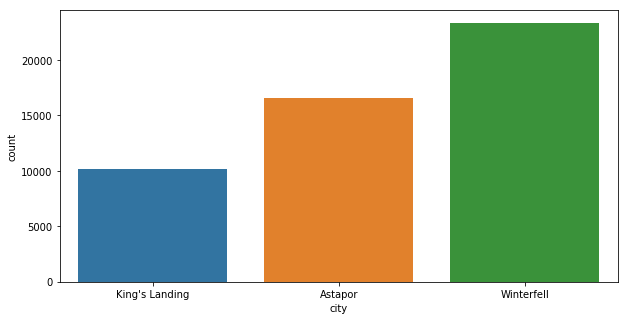

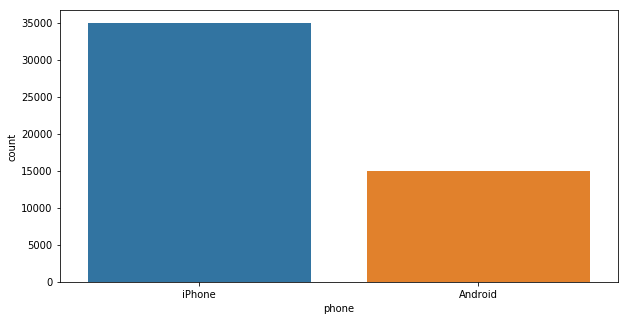

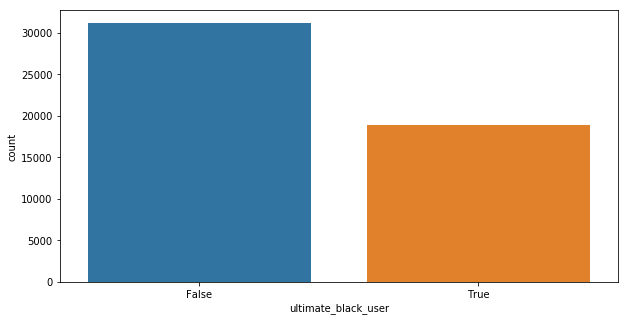

In [50]:
#Create plot for categorical variables
catp = ['city', 'phone', 'ultimate_black_user']
for i in catp:
    sns.countplot(x=i, data=df1)
    plt.show()

In [51]:
nf = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

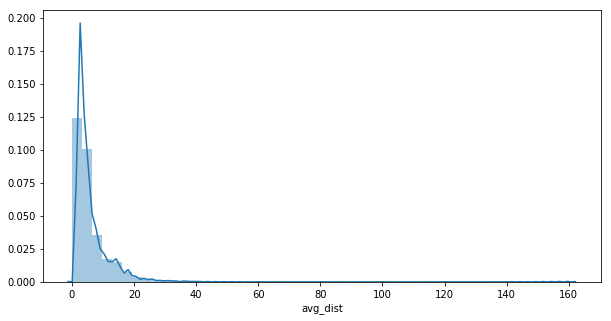

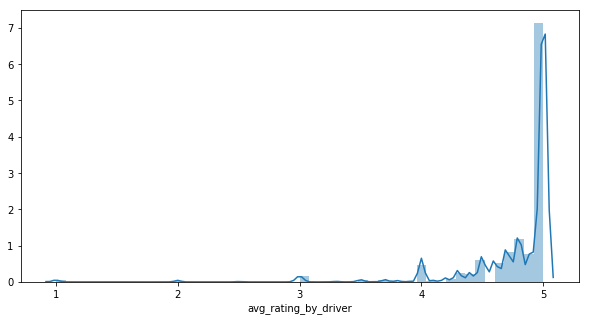

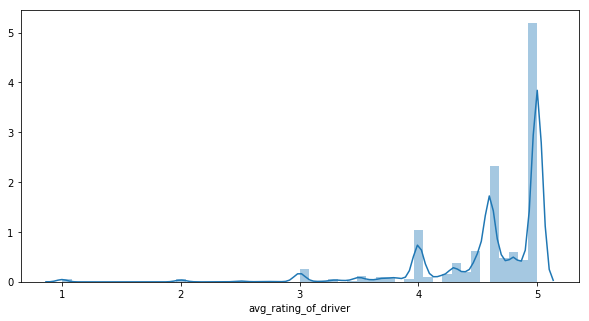

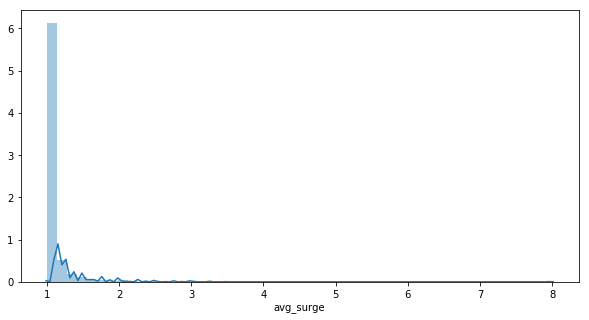

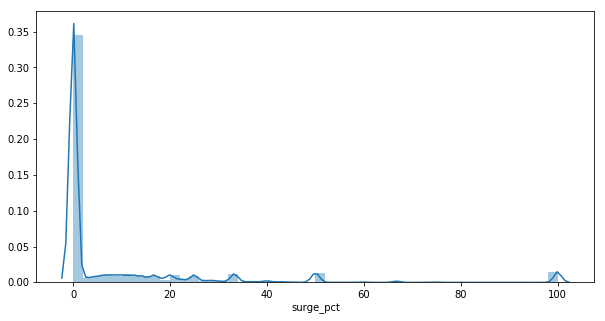

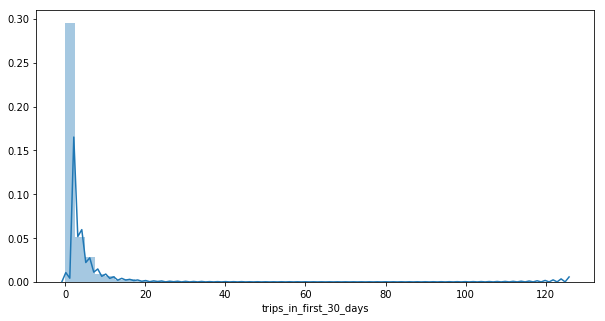

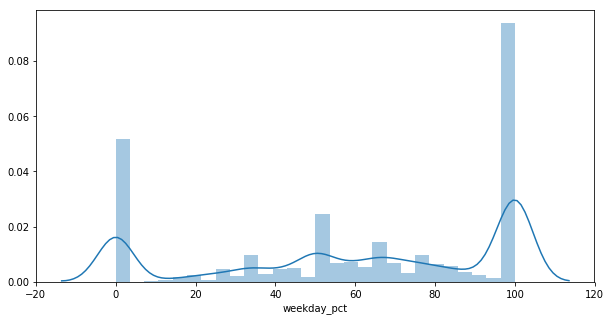

In [52]:
#show distbution 
for i in nf:
    sns.distplot(df1[i])
    plt.show()

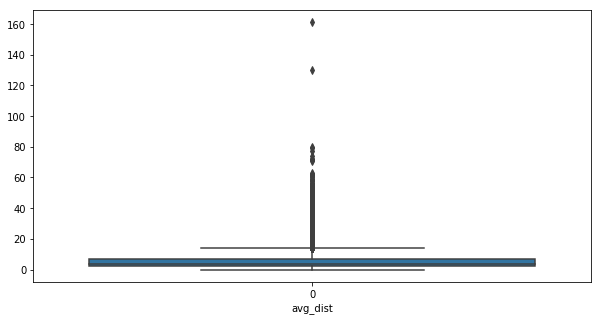

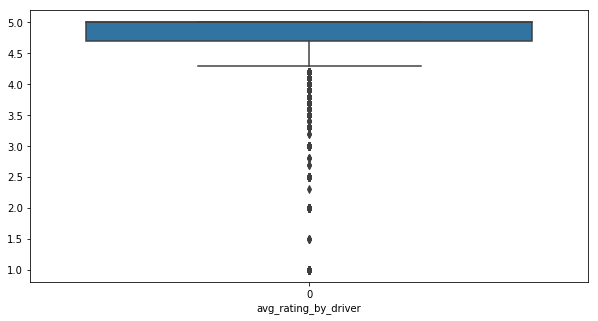

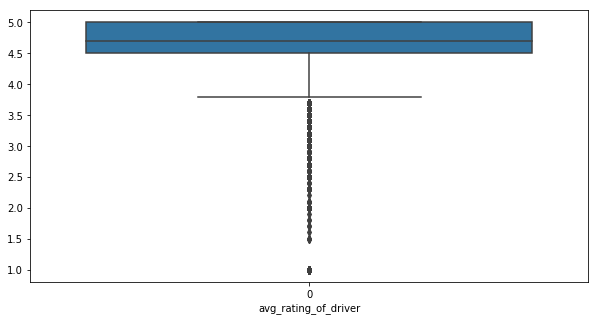

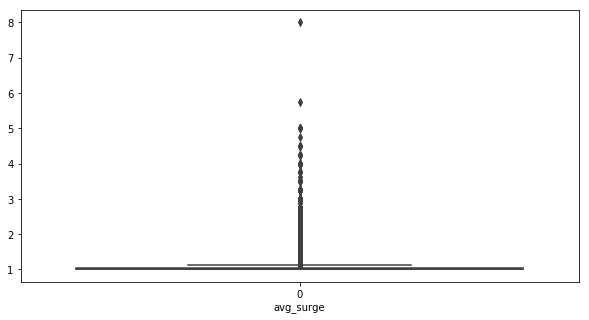

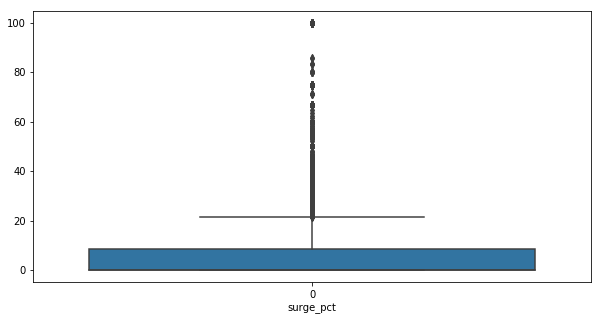

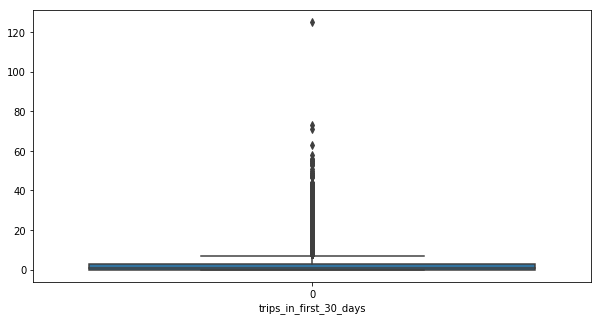

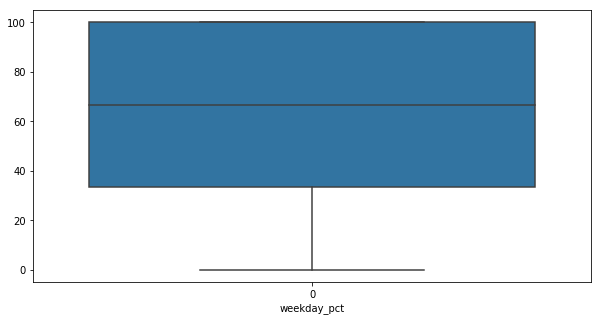

In [53]:
for i in nf:
    sns.boxplot(data=df1[i])
    plt.xlabel(i)
    plt.show()

There seems like there are outilers in this values lets filter them out 

In [54]:
nf

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'trips_in_first_30_days',
 'weekday_pct']

In [55]:
df2 =  df1[np.abs(df1['avg_dist']-df1['avg_dist'].mean()) <= (3*df1['avg_dist'].std())]
df2 =  df2[np.abs(df2['avg_rating_by_driver']-df2['avg_rating_by_driver'].mean()) <= (3*df2['avg_rating_by_driver'].std())]
df2 =  df2[np.abs(df2['avg_rating_of_driver']-df2['avg_rating_of_driver'].mean()) <= (3*df2['avg_rating_of_driver'].std())]
df2 =  df2[np.abs(df2['avg_surge']-df2['avg_surge'].mean()) <= (3*df2['avg_surge'].std())]
df2 =  df2[np.abs(df2['surge_pct']-df2['surge_pct'].mean()) <= (3*df2['surge_pct'].std())]
df2 =  df2[np.abs(df2['trips_in_first_30_days']-df2['trips_in_first_30_days'].mean()) <= (3*df2['trips_in_first_30_days'].std())]
df2.reset_index(drop=True, inplace=True)

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 12 columns):
avg_dist                  44666 non-null float64
avg_rating_by_driver      44666 non-null float64
avg_rating_of_driver      44666 non-null float64
avg_surge                 44666 non-null float64
city                      44666 non-null object
last_trip_date            44666 non-null datetime64[ns]
phone                     44666 non-null object
signup_date               44666 non-null datetime64[ns]
surge_pct                 44666 non-null float64
trips_in_first_30_days    44666 non-null int64
ultimate_black_user       44666 non-null bool
weekday_pct               44666 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.8+ MB


In [57]:
# Show the correlation matrix
corr_matrix = df2.corr()
corr_matrix

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.113764,0.036985,-0.125715,-0.141120,-0.157064,0.032364,0.106505
avg_rating_by_driver,0.113764,1.000000,0.108811,-0.054707,-0.045886,-0.136598,-0.020618,0.019580
avg_rating_of_driver,0.036985,0.108811,1.000000,-0.030831,-0.012833,-0.058875,-0.011233,0.004661
avg_surge,-0.125715,-0.054707,-0.030831,1.000000,0.849852,0.150471,-0.016889,-0.091408
surge_pct,-0.141120,-0.045886,-0.012833,0.849852,1.000000,0.145407,-0.035394,-0.103303
trips_in_first_30_days,-0.157064,-0.136598,-0.058875,0.150471,0.145407,1.000000,0.082045,0.025849
ultimate_black_user,0.032364,-0.020618,-0.011233,-0.016889,-0.035394,0.082045,1.000000,0.021997
weekday_pct,0.106505,0.019580,0.004661,-0.091408,-0.103303,0.025849,0.021997,1.000000


avg_surge and surge_pct are highly correrlated as expected, but no need to remove either of them as they are so few features

In [58]:
df2.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,44666.000000,44666.000000,44666.000000,44666.000000,44666.000000,44666.000000,44666.000000
mean,5.377194,4.822483,4.641089,1.043403,5.733392,2.008530,61.459837
std,4.321845,0.287647,0.453546,0.098875,11.578430,2.532519,36.346273
min,0.000000,3.500000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,2.440000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.800000,1.000000,0.000000,1.000000,66.700000
75%,6.770000,5.000000,5.000000,1.030000,6.300000,3.000000,100.000000
max,22.910000,5.000000,5.000000,1.710000,54.500000,14.000000,100.000000


In [59]:
#check number of retained based on the desciption
sorted(df2['last_trip_date'])[-1]

Timestamp('2014-07-01 00:00:00')

In [60]:
print(len(df2[df2['last_trip_date'] >= '2014-06-01']))

17235


In [61]:
17235/44666

0.38586396811892715

So 17235 or 38.5% of samples are considered retained

III. Data Modeling

In [62]:
# make the retanied variable 
df3 = df2


In [63]:
df3['retained'] = (df3['last_trip_date'] >= '2014-06-01')*1

In [64]:
del df3['last_trip_date']

In [65]:
df3.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,2014-01-27,11.8,14,False,82.4,0


In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 12 columns):
avg_dist                  44666 non-null float64
avg_rating_by_driver      44666 non-null float64
avg_rating_of_driver      44666 non-null float64
avg_surge                 44666 non-null float64
city                      44666 non-null object
phone                     44666 non-null object
signup_date               44666 non-null datetime64[ns]
surge_pct                 44666 non-null float64
trips_in_first_30_days    44666 non-null int64
ultimate_black_user       44666 non-null bool
weekday_pct               44666 non-null float64
retained                  44666 non-null int32
dtypes: bool(1), datetime64[ns](1), float64(6), int32(1), int64(1), object(2)
memory usage: 3.6+ MB


In [67]:
del df3['signup_date']

In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 11 columns):
avg_dist                  44666 non-null float64
avg_rating_by_driver      44666 non-null float64
avg_rating_of_driver      44666 non-null float64
avg_surge                 44666 non-null float64
city                      44666 non-null object
phone                     44666 non-null object
surge_pct                 44666 non-null float64
trips_in_first_30_days    44666 non-null int64
ultimate_black_user       44666 non-null bool
weekday_pct               44666 non-null float64
retained                  44666 non-null int32
dtypes: bool(1), float64(6), int32(1), int64(1), object(2)
memory usage: 3.3+ MB


In [69]:
#encoding for the categorical varabiles 
df4 = pd.get_dummies(df3, columns = ['city', 'phone', 'ultimate_black_user'])

In [70]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 15 columns):
avg_dist                     44666 non-null float64
avg_rating_by_driver         44666 non-null float64
avg_rating_of_driver         44666 non-null float64
avg_surge                    44666 non-null float64
surge_pct                    44666 non-null float64
trips_in_first_30_days       44666 non-null int64
weekday_pct                  44666 non-null float64
retained                     44666 non-null int32
city_Astapor                 44666 non-null uint8
city_King's Landing          44666 non-null uint8
city_Winterfell              44666 non-null uint8
phone_Android                44666 non-null uint8
phone_iPhone                 44666 non-null uint8
ultimate_black_user_False    44666 non-null uint8
ultimate_black_user_True     44666 non-null uint8
dtypes: float64(6), int32(1), int64(1), uint8(7)
memory usage: 2.9 MB


After cleaning, The random forest model will be used becuase it can get the feature importance of the factors that leads one to be retained. Futhermore since it an ensemble model that uses bagging it can run different estimaros which avoids overfiting

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

In [72]:
y = df4['retained']
X = df4.drop('retained', axis=1)

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [75]:
rf.fit(X_train, y_train)

C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
predtrain = rf.predict(X_train)
predtest = rf.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
print('accuracy scores training set: ',accuracy_score(y_train, predtrain))
print('accuracy scores test set: ',accuracy_score(y_test, predtest))

accuracy scores training set:  0.9759879099966416
accuracy scores test set:  0.7444593687038281


Without any cross valdiation or hyperparameter tuning we get a model with 74.34% accuracy.

In [80]:
f1 = pd.DataFrame(list(zip(X.columns, rf.feature_importances_)), columns = ['features', 'Importance'])

In [81]:
print(f1)

                     features  Importance
0                    avg_dist    0.310725
1        avg_rating_by_driver    0.107504
2        avg_rating_of_driver    0.080138
3                   avg_surge    0.068955
4                   surge_pct    0.082271
5      trips_in_first_30_days    0.080162
6                 weekday_pct    0.128958
7                city_Astapor    0.015502
8         city_King's Landing    0.041585
9             city_Winterfell    0.016427
10              phone_Android    0.023763
11               phone_iPhone    0.015817
12  ultimate_black_user_False    0.013626
13   ultimate_black_user_True    0.014568


Without any cross valdiation or hyperparameter the most important feature is average distance

In [82]:
#Cross validation
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X, y, cv=5)
print(cv_scores)

C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.73942243 0.73390798 0.74163215 0.74420687 0.73804993]


In [83]:
print("Average Score: {}".format(np.mean(cv_scores)))

Average Score: 0.7394438727766447


Cross Validation got around the same 74% score

In [84]:
from sklearn.model_selection import GridSearchCV 

In [85]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

In [86]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [87]:
grid = GridSearchCV(estimator = rf, param_grid = random_grid,  n_jobs = -1, verbose = 2)

In [88]:
grid.fit(X_train, y_train)

C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s


KeyboardInterrupt: 

In [ ]:
print(grid.best_estimator_)

In [ ]:
rf2bestn = RandomForestClassifier(n_estimators=100)
rf2bestn.fit(X_train, y_train)
sen_pred_trainrf2bestn = rf2bestn.predict(X_train)
sen_pred_testrf2bestn = rf2bestn.predict(X_test)
print('accuracy scores training set: ',accuracy_score(y_train,sen_pred_trainrf2bestn))
print('accuracy scores test set: ',accuracy_score(y_test,sen_pred_testrf2bestn))
print(classification_report(y_test, sen_pred_testrf2bestn)) 

In [ ]:
pred_test_roc = rf2bestn.predict_proba(X_test)
pred_test_roc_positive = pred_test_roc[:, 1]

In [151]:
auc = roc_auc_score(y_test, pred_test_roc_positive)
print('AUC: %.4f' % auc)

AUC: 0.8226


In [152]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_roc_positive)

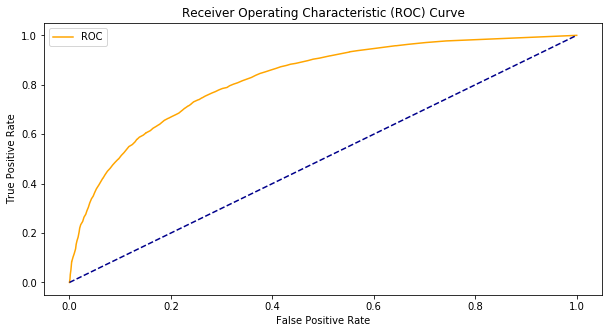

In [153]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The metrics of final model are:

Test set accuracy: 75%
AUC: 0.8220

In [155]:
f2 = pd.DataFrame(list(zip(X.columns, rf2bestn.feature_importances_)), columns = ['features', 'Importance'])
f2.sort_values(by='Importance', ascending=False)

,features,Importance
0,avg_dist,0.311985
6,weekday_pct,0.133609
1,avg_rating_by_driver,0.107967
4,surge_pct,0.082129
2,avg_rating_of_driver,0.080459
5,trips_in_first_30_days,0.078929
3,avg_surge,0.063839
8,city_King's Landing,0.046399
10,phone_Android,0.019367
11,phone_iPhone,0.018874



From the importance of features, we find that the most important 3 features are:

<ol>
<li>avg_dist: the average distance in miles per trip taken in the first 30 days after signup</li>
<li>weekday_pct: the percent of the user’s trips occurring during a weekday</li>
<li>avg_rating_by_driver: the rider’s average rating over all of their trips</li>
</ol>


To improve long-term rider retention, Ultimate need improve in the following aspects:

Attract riders to take longer trips during the first 30 days after signup.
Persuade riders to take trips during weekdays with promotions and deals.
Provide better services/deals to improve the realtionshp between rider and driver